In [77]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
df = pd.read_csv("../data/airline.csv")
print(df.shape)
print(df.columns)

(3441800, 36)
Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'CRSElapsedTime',
       'CancellationCode', 'Cancelled', 'CarrierDelay', 'DayOfWeek',
       'DayofMonth', 'DepDelay', 'Dest', 'Distance', 'Diverted', 'FlightNum',
       'LateAircraftDelay', 'Month', 'NASDelay', 'Origin', 'SecurityDelay',
       'TailNum', 'TaxiIn', 'TaxiOut', 'UniqueCarrier', 'WeatherDelay', 'Year',
       'Prior', 'ArrDelayClass', 'CRSDepTimeH', 'DepTimeH', 'DepTimeM',
       'ArrTimeH', 'ArrTimeM', 'CRSDepTimeM', 'CRSArrTimeH', 'CRSArrTimeM',
       'Holiday'],
      dtype='object')


ArrDelayClasses: [1 0]
74.36% of flights are on time, 25.64% are delayed
Of those who are delayed:
4.67% of the delay time is caused by WeatherDelay
32.43% of the delay time is caused by NASDelay
24.29% of the delay time is caused by CarrierDelay
0.18% of the delay time is caused by SecurityDelay


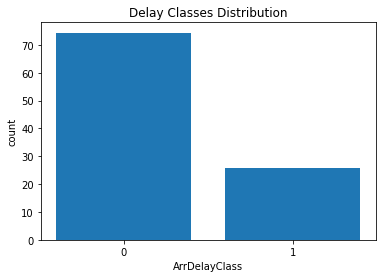

In [16]:
tmp_delay_perc = round(df.groupby("ArrDelayClass").count().reset_index().AirTime/len(df)*100, 2)

plt.bar(x=["0", "1"], height=list(tmp_delay_perc))
plt.title("Delay Classes Distribution")
plt.xlabel("ArrDelayClass")
plt.ylabel("count")
print(f"ArrDelayClasses: {df.ArrDelayClass.unique()}")
print(f"{tmp_delay_perc[0]}% of flights are on time, {tmp_delay_perc[1]}% are delayed")
print("Of those who are delayed:")
tmp_df = df.loc[df.ArrDelay>=15]
for delay_type in ["WeatherDelay", "NASDelay", "CarrierDelay", "SecurityDelay"]:
    print(f"{round(sum(tmp_df[delay_type])/sum(tmp_df.ArrDelay)*100, 2)}% of the delay time is caused by {delay_type}")
plt.show()

Text(1.3, 1.15, 'night: 22:00 - 5:00\nmorning: 5:00 - 12:00\nafternoon: 12:00 - 17:00\nevening: 17:00 - 22:00')

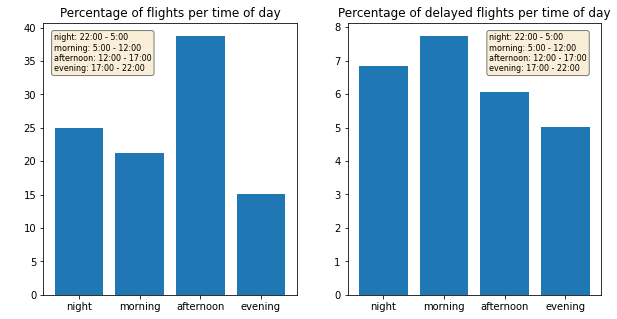

In [75]:
# transform DepTime into categorial variable (morning, afternoon, evening, night)
def convert_time_to_category(h:int, m:int) -> str:
    """
     0 = night (7:00h), 1 = morning (7:00h), 2 = afternoon (5h), 3 = evening (5h)
    """
    time = int(f"{int(h)}{int(m)}")
    if 2200 <= time <= 2400 or 0 <= time < 500:
        return "night"
    elif 500 <= time < 1200:
        return "morning"
    elif 1200 <= time < 1700:
        return "afternoon"
    elif 1700 <= time < 2200:
        return "evening"
    else:
        print("Could not convert time")
        return None
    
# transform DepTime into categorial variable (morning, afternoon, evening, night)
df["DepTimeCat"] = df[["DepTimeH", "DepTimeM"]].apply(lambda x: convert_time_to_category(*x), axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(x=["night", "morning", "afternoon", "evening"], height=round(df.groupby("DepTimeCat").count().reset_index().AirTime /len(df) * 100, 2).tolist())
ax1.set_title("Percentage of flights per time of day")
textstr= "night: 22:00 - 5:00\nmorning: 5:00 - 12:00\nafternoon: 12:00 - 17:00\nevening: 17:00 - 22:00"
ax1.text(0, 1.15, textstr, transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.bar(x=["night", "morning", "afternoon", "evening"], height=round(df.loc[df.ArrDelayClass == 1].groupby("DepTimeCat").count().reset_index().AirTime /len(df) * 100, 2).tolist())
ax2.set_title("Percentage of delayed flights per time of day")
ax2.text(1.3, 1.15, textstr, transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

Text(0, 0.5, 'DepDelay [min]')

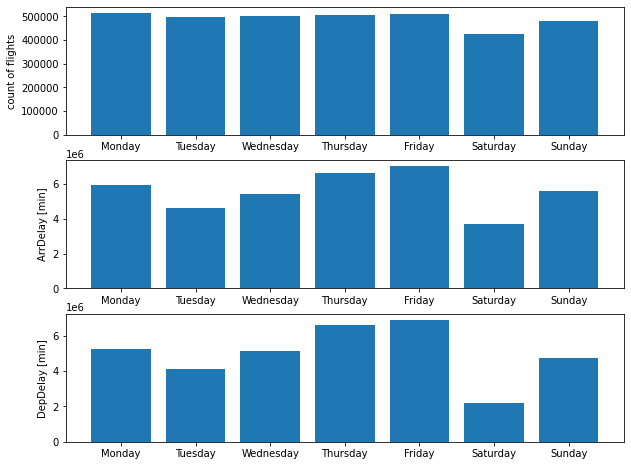

In [6]:
# 1= monday, 7=sunday
tmp_df = df.groupby("DayOfWeek").count().reset_index()
# display(tmp_df)
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,8))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax1.bar(x=days, height=tmp_df.AirTime)
ax1.set_ylabel("count of flights")

tmp_df = df.groupby("DayOfWeek").sum().reset_index()
ax2.bar(x=days, height=tmp_df.DepDelay)
ax2.set_ylabel("ArrDelay [min]")

ax3.bar(x=days, height=tmp_df.ArrDelay)
ax3.set_ylabel("DepDelay [min]")

Text(0, 0.5, 'DepDelay [min]')

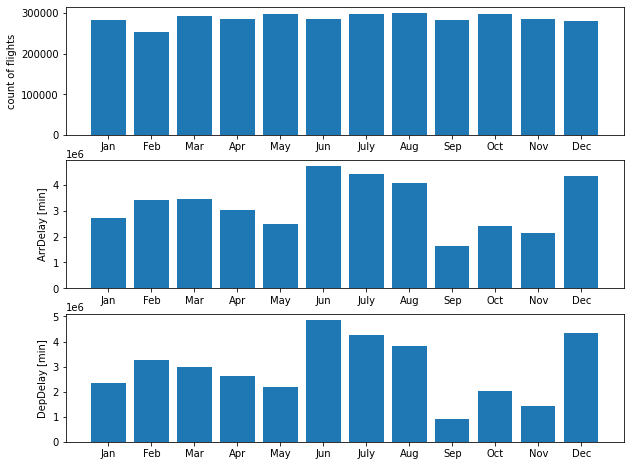

In [7]:
# 1= Jan, 12=Dec
tmp_df = df.groupby("Month").count().reset_index()
# display(tmp_df)
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,8))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax1.bar(x=months, height=tmp_df.AirTime)
ax1.set_ylabel("count of flights")

tmp_df = df.groupby("Month").sum().reset_index()
ax2.bar(x=months, height=tmp_df.DepDelay)
ax2.set_ylabel("ArrDelay [min]")

ax3.bar(x=months, height=tmp_df.ArrDelay)
ax3.set_ylabel("DepDelay [min]")

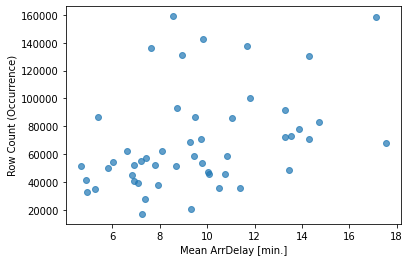

In [78]:
# create count column
df['count'] = 1

fig = plt.figure()
ax = plt.gca()

# group Data Frame by UniqueCarrier 
for name, group in df.groupby('Origin'):
    # add one scatter plot point per group
    ax.scatter(group['ArrDelay'].mean(),group['count'].sum(),
                c='#1f77b4',
                alpha =0.7, 
                label=name)

# change axis scale
## ax.set_yscale('log')
## ax.set_xscale('log')

# add a legend
## plt.legend()

# add labels
plt.xlabel("Mean ArrDelay [min.]")
plt.ylabel("Row Count (Occurrence)")

# show the plot
plt.show()

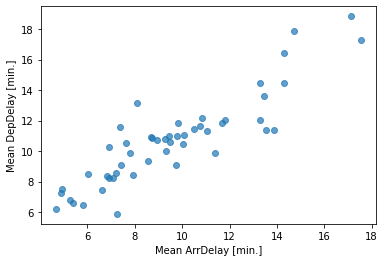

In [79]:
# create count column
df['count'] = 1

fig = plt.figure()
ax = plt.gca()

# group Data Frame by UniqueCarrier 
for name, group in df.groupby('Origin'):
    # add one scatter plot point per group
    ax.scatter(group['ArrDelay'].mean(),group['DepDelay'].mean(),alpha =0.7, c='#1f77b4',
                label=name)

# change axis scale
## ax.set_yscale('log')
## ax.set_xscale('log')

# add a legend
## plt.legend()

# add labels
plt.xlabel("Mean ArrDelay [min.]")
plt.ylabel("Mean DepDelay [min.]")


# show the plot
plt.show()

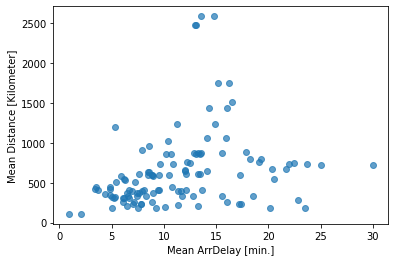

In [24]:
# create count column
df['Count'] = 1

fig = plt.figure()
ax = plt.gca()

# group Data Frame by UniqueCarrier 
for name, group in df.groupby(['Origin','Dest']):
    if group['Count'].count() > 5000:
        ax.scatter(
            x = group['ArrDelay'].mean(),
            y=group['Distance'].mean(),
            c='#1f77b4',
            alpha =0.7, 
            label=name)

# add labels
plt.xlabel("Mean ArrDelay [min.]")
plt.ylabel("Mean Distance [Kilometer]")

# show the plot
plt.show()